## Capstone 2: narrative analytics & experimentation

The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

1. Analysis that highlights your experimental hypothesis.
2. A rollout plan showing how you would implement and rollout the experiment
3. An evaluation plan showing what constitutes success in this experiment

Data Source:
https://data.medicare.gov/Hospital-Compare/Hospital-Readmissions-Reduction-Program/9n3s-kdb3

Data Description:
In October 2012, CMS began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, calculated by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack (AMI), heart failure (HF), pneumonia, chronic obstructive pulmonary disease (COPD), hip/knee replacement (THA/TKA), and coronary artery bypass graft surgery (CABG) by the number that would be “expected,” based on an average hospital with similar patients.

### Part 1: Analysis and experimental hypothesis

#### The Problem
Under current CMS protocols, hospitals receive reimbursement for patient care based on diagnostic related groupings (DRGs).This system assumes that patients with clinically similar diagnoses will require similar care, and thus their care will "cost" the same. Under this system the hospital receives a fixed payment from Medicare based the DRG code rather than the actual cost of individual patient admissions.  If the cost of the care exceeds the fixed payment, the hospital is required to absorb the cost. However, if the cost of care is less than the fixed payment, the hospital makes a "profit."  

Under this system, CMS began reducing or even eliminating Medicare payments to hospitals with "excess" readmissions for specific DRG codes. In theory, the system is designed to discourage hospitals from discharging patients prematurely in order to profit from their admission. However, in the case of many chronic conditions, multiple readmissions are quite common. In an effort to reduce excess readmissions and the associated loss of revenue, many hospitals are searching for the most cost-effective way to provide the appropriate care for their patients while in-hospital and also manage their chronic conditions to avoid an acute decompensations which would require readmission. 

Among the DRGs tracked by CMS, heart failure (HF) has the highest readmission rate of 24.5% (based on 2011 data,  reference needed). The purpose of our study will be to evaluate whether specific in-hospital interventions during the initial admission are effective at reducing the rate of readmissions for our HF patients, thus reducing the overall cost to care for these patients. The cost of the proposed intervention (staffing) must be weighed against the potential savings gained by reducing readmission. 

#### Potential Solution
Studies have shown that in-depth diet education on reducing dietary sodium have slowed the progression of the disease in early HF and reduced the incidence of decompensation in advanced HF (references needed). Our proposal is that providing a total of two 1-hour education sessions to each patient admitted for HF prior to discharge will significantly reduce the number of readmissions. 

#### Hypothesis: 
Intensive diet education provided by a Registered Dietitian (RD) will significantly reduce the number of <30-day readmissions.

**Null:** Intensive diet education by RD will not significantly reduce the number of <30-day readmissions. 

### Part 2: Implementation and rollout

1. Alert for all HF admissions (flag for DRG, diagnosis, past medical history (PMH), admitting service (Cardiology, HF, Transplant, Interventional Cardiology).
2. Determine whether initial or readmission (still want to reduce FURTHER readmission, but primary target is initial admission).
3. Random assignment: there are two ways to handle assignment to control vs test groups: prospective vs retrospective. 
A **prospective** test allows for a more random selection of patients to the control vs test groups and provides a more clear test between control and intervention. The downside of conducting a prospective test is that it will require a much longer testing timeframe in order to gather the appropriate number of patients for a valid test. All test subjects would be selected and randomized as initial HF admissions occurred. Once enough subject have been enrolled, a waiting period of at least 30-days must pass before it can be determined if the last subject enrolled was readmitted in a 30-day period. Although this version of the test is superior to a retrospective test, depending on the number of admissions expected, it may take too long to conduct a valid test in a reasonable time period. This is especially true if the administration is waiting for results to determine if an increase in staffing is warranted. This version will be used if time permits. Otherwise, a retrospective version will be conducted as follows. 
For a **retrospective** test, a chart review of all *initial* HF admissions over the last XX time period will be conducted. An appropriate number of admissions will be determined for a valid test and this number will be randomly selected from elegible patient to control group (A). All new initial admissions for HF will be selected to test group (B)after a pre-determined commencement date. All subjects in the test group will recieve the intervention as described in the next section. After the appropirate number of subjects has been reached and a 30-day period of potential readmission has been observed, collection of readmission data can begin for both group A (if not already completed during the chart review) and group B. 
4. For **prospective** study, control group to receive standard care, including visit by floor RD. If control group is selected **retrospectively**, a note should be made regarding any RD visits (for secondary measures). 
Test group to receive two 1-hour education sessions with HF RD scheduled prior to discharge. Education includes prepared materials (handouts), food frequency, review of phone apps to track sodium, food diary, sodium budget.
5. Pre- and post-testing of knowledge to determine whether education was successful (secondary metric).
6. All admitted patients entered into study database to be tracked for potential readmission. 
7. Define testing period: testing to last either for X timeframe or, more appropriately, until predetermined number of subjects has been reached. Once all subjects have been assigned to a group and discharged, a 30-day waiting period will commence before readmissions can be determined. 

### Part 3: Evaluation

Key Metric: 30-day readmission rate
Secondary metrics: success of education (pre- & post-test), 90-day readmission, amount of time spent with RD in each group

A successful test would significantly reduce the 30-day readmission ratio as determined by t-test and a **p-value <0.05.**

Compare cost of RD vs cost (savings) of readmissions

** expected readmission ratio & actual readmission ratio for HF: nationally, PA, hosp
** average HF readmission: nationally, PA, hosp

Current HF <30-day readmissions: XXXX
Current cost to hospital based on $XX,XXX per <30-day readmission:
Cost for additional staffing of RD for HF educations: $XX,XXX
Potential savings to hospital per year: $XX,XXX

#### Current metrics: 
**National**
Expected readmission ratio:  1.003497
Actual readmission ratio: 1.015268

Ttest_indResult(statistic=-3.088437988783884, pvalue=0.002022453586388105)

**State**
Expected readmission ratio:  0.995835
Actual readmission ratio: 1.004040

Ttest_indResult(statistic=-0.528347118740563, pvalue=0.5977126013692862)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Data cleaning

In [2]:
df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\Hospital_Readmissions_Reduction_Program.csv')

###### Add column with shortened Measure Name for plotting.

In [3]:
df['Measure Name'].unique()

array(['READM_30_AMI_HRRP', 'READM_30_CABG_HRRP', 'READM_30_COPD_HRRP',
       'READM_30_HF_HRRP', 'READM_30_HIP_KNEE_HRRP', 'READM_30_PN_HRRP'],
      dtype=object)

In [4]:
def measure (row):
   if row['Measure Name'] == 'READM_30_COPD_HRRP' :
      return 'COPD'
   if row['Measure Name'] == 'READM_30_HF_HRRP' :
      return 'HF'
   if row['Measure Name'] == 'READM_30_PN_HRRP' :
      return 'PN'
   if row['Measure Name'] == 'READM_30_AMI_HRRP' :
      return 'AMI'
   if row['Measure Name'] == 'READM_30_HIP_KNEE_HRRP' :
      return 'HIP_KNEE'
   if row['Measure Name'] == 'READM_30_CABG_HRRP' :
      return 'CABG'

In [5]:
df['measure'] = df.apply (lambda row: measure(row), axis=1)

In [6]:
df.head()

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,measure
0,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_AMI_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,7/1/2014,6/30/2017,AMI
1,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_CABG_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,7/1/2014,6/30/2017,CABG
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,7/1/2014,6/30/2017,COPD
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,NaN,1.0773,23.9788,22.2578,67,7/1/2014,6/30/2017,HF
4,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HIP_KNEE_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,7/1/2014,6/30/2017,HIP_KNEE


###### Remove missing values by converting 'Not Available' values to NaN, then dropping NaN values.

In [7]:
df_with_nans = df.applymap(lambda elem: float('NaN') if elem == "Not Available" else elem)

In [8]:
df_with_nans.head(10)

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,measure
0,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_AMI_HRRP,NaN,1 - The number of cases/patients is too few to...,NaN,NaN,NaN,NaN,7/1/2014,6/30/2017,AMI
1,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_CABG_HRRP,NaN,1 - The number of cases/patients is too few to...,NaN,NaN,NaN,NaN,7/1/2014,6/30/2017,CABG
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,7/1/2014,6/30/2017,COPD
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,NaN,1.0773,23.9788,22.2578,67,7/1/2014,6/30/2017,HF
4,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HIP_KNEE_HRRP,NaN,1 - The number of cases/patients is too few to...,NaN,NaN,NaN,NaN,7/1/2014,6/30/2017,HIP_KNEE
5,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_PN_HRRP,213,NaN,1.1031,19.2445,17.4459,47,7/1/2014,6/30/2017,PN
6,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_AMI_HRRP,NaN,1 - The number of cases/patients is too few to...,NaN,NaN,NaN,NaN,7/1/2014,6/30/2017,AMI
7,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_CABG_HRRP,NaN,5 - Results are not available for this reporti...,NaN,NaN,NaN,NaN,7/1/2014,6/30/2017,CABG
8,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_COPD_HRRP,NaN,5 - Results are not available for this reporti...,1.0024,18.0061,17.963,NaN,7/1/2014,6/30/2017,COPD
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HF_HRRP,75,NaN,0.9726,19.6816,20.2355,13,7/1/2014,6/30/2017,HF


###### Make a copy of df ( rather than a slice) to avoid errors and warnings

In [9]:
df_readmin = df_with_nans.dropna(subset=df_with_nans.columns.drop('Footnote')).copy() 

In [10]:
df_readmin.head(5)

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,measure
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,7/1/2014,6/30/2017,COPD
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,NaN,1.0773,23.9788,22.2578,67,7/1/2014,6/30/2017,HF
5,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_PN_HRRP,213,NaN,1.1031,19.2445,17.4459,47,7/1/2014,6/30/2017,PN
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HF_HRRP,75,NaN,0.9726,19.6816,20.2355,13,7/1/2014,6/30/2017,HF
11,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_PN_HRRP,153,NaN,0.9719,14.1502,14.5594,20,7/1/2014,6/30/2017,PN


In [11]:
df_readmin.groupby('Measure Name')['Excess Readmission Ratio'].describe()

,count,unique,top,freq
Measure Name,,,,
READM_30_AMI_HRRP,1666,1195,1.0273,6
READM_30_CABG_HRRP,596,550,0.9648,3
READM_30_COPD_HRRP,2551,1564,0.9765,7
READM_30_HF_HRRP,2670,1760,0.9943,6
READM_30_HIP_KNEE_HRRP,1301,1141,0.8791,4
READM_30_PN_HRRP,2748,1806,1.0213,6


In [12]:
df_readmin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11532 entries, 2 to 19673
Data columns (total 13 columns):
Hospital Name                 11532 non-null object
Provider ID                   11532 non-null int64
State                         11532 non-null object
Measure Name                  11532 non-null object
Number of Discharges          11532 non-null object
Footnote                      15 non-null object
Excess Readmission Ratio      11532 non-null object
Predicted Readmission Rate    11532 non-null object
Expected Readmission Rate     11532 non-null object
Number of Readmissions        11532 non-null object
Start Date                    11532 non-null object
End Date                      11532 non-null object
measure                       11532 non-null object
dtypes: int64(1), object(12)
memory usage: 1.2+ MB


###### Convert selected columns to numeric

In [13]:
for column in ['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions']:
    df_readmin[column] = pd.to_numeric(df_readmin[column], errors = 'coerce', downcast = 'float')

In [14]:
df_readmin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11532 entries, 2 to 19673
Data columns (total 13 columns):
Hospital Name                 11532 non-null object
Provider ID                   11532 non-null int64
State                         11532 non-null object
Measure Name                  11532 non-null object
Number of Discharges          11532 non-null float32
Footnote                      15 non-null object
Excess Readmission Ratio      11532 non-null float32
Predicted Readmission Rate    11532 non-null float32
Expected Readmission Rate     11532 non-null float32
Number of Readmissions        11532 non-null float32
Start Date                    11532 non-null object
End Date                      11532 non-null object
measure                       11532 non-null object
dtypes: float32(5), int64(1), object(7)
memory usage: 1.0+ MB


In [15]:
df_readmin.groupby('Measure Name')['Excess Readmission Ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
Measure Name,,,,,,,,
READM_30_AMI_HRRP,1666.0,1.005694,0.068506,0.7479,0.962050,1.00620,1.049875,1.2927
READM_30_CABG_HRRP,596.0,1.022244,0.118904,0.7428,0.940425,1.02185,1.100550,1.7072
READM_30_COPD_HRRP,2551.0,1.004937,0.062906,0.8126,0.964350,1.00220,1.041750,1.3222
READM_30_HF_HRRP,2670.0,1.003497,0.076744,0.7467,0.953625,1.00095,1.052000,1.3394
READM_30_HIP_KNEE_HRRP,1301.0,1.022134,0.153250,0.5982,0.911500,1.01080,1.116900,1.8256
READM_30_PN_HRRP,2748.0,1.004802,0.081388,0.7610,0.948400,0.99880,1.055625,1.3801


In [16]:
#select out HF
df_readmin.drop(df_readmin[df_readmin.measure != 'HF'].index, inplace=True)

In [17]:
df_readmin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 3 to 19671
Data columns (total 13 columns):
Hospital Name                 2670 non-null object
Provider ID                   2670 non-null int64
State                         2670 non-null object
Measure Name                  2670 non-null object
Number of Discharges          2670 non-null float32
Footnote                      3 non-null object
Excess Readmission Ratio      2670 non-null float32
Predicted Readmission Rate    2670 non-null float32
Expected Readmission Rate     2670 non-null float32
Number of Readmissions        2670 non-null float32
Start Date                    2670 non-null object
End Date                      2670 non-null object
measure                       2670 non-null object
dtypes: float32(5), int64(1), object(7)
memory usage: 239.9+ KB


In [18]:
df_readmin.head()

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,measure
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259.0,NaN,1.0773,23.978800,22.257799,67.0,7/1/2014,6/30/2017,HF
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HF_HRRP,75.0,NaN,0.9726,19.681601,20.235500,13.0,7/1/2014,6/30/2017,HF
21,CHESHIRE MEDICAL CENTER,300019,NH,READM_30_HF_HRRP,303.0,NaN,0.9514,19.854500,20.869600,57.0,7/1/2014,6/30/2017,HF
27,PENNSYLVANIA HOSPITAL,390226,PA,READM_30_HF_HRRP,392.0,NaN,0.9946,21.772100,21.889999,85.0,7/1/2014,6/30/2017,HF
33,HILL REGIONAL HOSPITAL,450192,TX,READM_30_HF_HRRP,66.0,NaN,1.0198,20.831200,20.427401,15.0,7/1/2014,6/30/2017,HF


In [19]:
#national HF readmission results
df_readmin.describe()

,Provider ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000
mean,259172.926966,412.806000,1.003497,21.334616,21.244396,88.821724
std,155831.464170,360.122009,0.076744,2.233239,1.253852,79.606148
min,10001.000000,33.000000,0.746700,15.134900,17.072701,11.000000
25%,110142.250000,155.250000,0.953625,19.766250,20.436474,32.000000
50%,250059.500000,310.000000,1.000950,21.223499,21.272650,66.000000
75%,390051.500000,551.750000,1.052000,22.736875,22.049824,118.000000
max,670108.000000,3752.000000,1.339400,30.447300,27.027300,921.000000


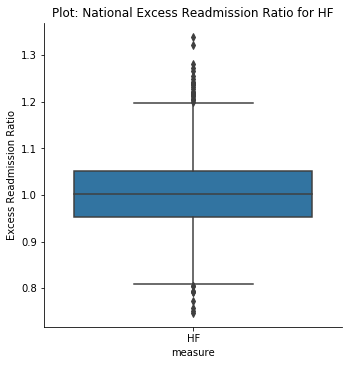

In [22]:
sns.catplot(x='measure', y='Excess Readmission Ratio', 
            data=df_readmin, kind = 'box')
plt.title('Plot: National Excess Readmission Ratio for HF')
plt.show()

In [21]:
#state HF readmission results
#print(df_readmin.loc[df_readmin['State'].isin('PA'))
df_readmin.loc[df_readmin['State'] == 'PA'].describe()                    
#hf_pa = df_readmin['State'] == 'PA


,Provider ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,390130.761538,420.330780,0.995835,21.088327,21.177412,87.607689
std,84.585153,338.408966,0.072164,1.925358,1.163027,68.723068
min,390001.000000,37.000000,0.751900,15.707600,17.910500,11.000000
25%,390061.250000,173.250000,0.958500,19.864151,20.510026,36.000000
50%,390118.500000,352.000000,0.991000,20.973249,21.187651,71.000000
75%,390194.750000,548.250000,1.040175,22.152549,21.898175,112.750000
max,390330.000000,1848.000000,1.158800,27.243000,24.221300,429.000000


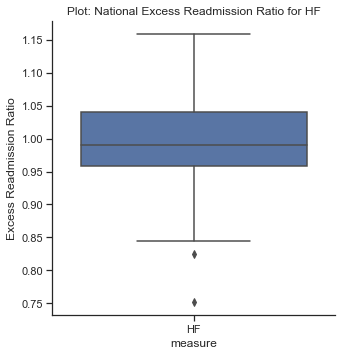

In [59]:
state_hf = df_readmin[(df_readmin['State']=='PA')]
sns.catplot(x='measure', y='Excess Readmission Ratio', 
            data=state_hf, kind = 'box')
plt.title('Plot: National Excess Readmission Ratio for HF')
plt.show()

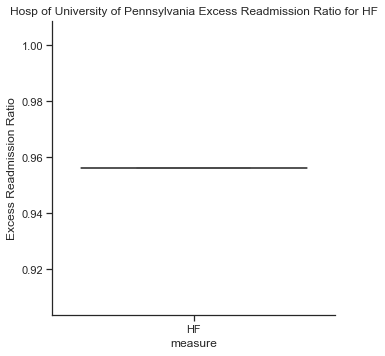

In [63]:
hosp_hf = df_readmin.loc[(df_readmin['Hospital Name']=='HOSPITAL OF UNIV OF PENNSYLVANIA')]
sns.catplot(x='measure', y='Excess Readmission Ratio', 
            data=hosp_hf, kind = 'box')
plt.title('Hosp of University of Pennsylvania Excess Readmission Ratio for HF')
plt.show()

Excess Readmission Ratio: represents Hospital's "predicted" number of readmissions compared to CMS "expected" number of readmissions. 

Calculate the **Actual Readmission Rate** = 'actual_rrate' (number of readmissions/discharges)

Calculate the **Actual Readmission Ratio** = 'actual_rratio' ('actual_rrate'/'Expected Readmission Rate') in order to compare the Excess Readmission Ratio

In [23]:
df_readmin['actual_rrate'] = df_readmin['Number of Readmissions']/df_readmin['Number of Discharges'] * 100

In [24]:
df_readmin['actual_rratio'] = df_readmin['actual_rrate']/df_readmin['Expected Readmission Rate']

In [25]:
df_readmin.head()

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,measure,actual_rrate,actual_rratio
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259.0,NaN,1.0773,23.978800,22.257799,67.0,7/1/2014,6/30/2017,HF,25.868725,1.162232
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HF_HRRP,75.0,NaN,0.9726,19.681601,20.235500,13.0,7/1/2014,6/30/2017,HF,17.333334,0.856580
21,CHESHIRE MEDICAL CENTER,300019,NH,READM_30_HF_HRRP,303.0,NaN,0.9514,19.854500,20.869600,57.0,7/1/2014,6/30/2017,HF,18.811882,0.901401
27,PENNSYLVANIA HOSPITAL,390226,PA,READM_30_HF_HRRP,392.0,NaN,0.9946,21.772100,21.889999,85.0,7/1/2014,6/30/2017,HF,21.683674,0.990574
33,HILL REGIONAL HOSPITAL,450192,TX,READM_30_HF_HRRP,66.0,NaN,1.0198,20.831200,20.427401,15.0,7/1/2014,6/30/2017,HF,22.727274,1.112588


In [44]:
df_readmin.describe()

,Provider ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,actual_rrate,actual_rratio
count,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000
mean,259172.926966,412.806000,1.003497,21.334616,21.244396,88.821724,21.596794,1.015268
std,155831.464170,360.122009,0.076744,2.233239,1.253852,79.606148,4.173135,0.181400
min,10001.000000,33.000000,0.746700,15.134900,17.072701,11.000000,8.955224,0.471035
25%,110142.250000,155.250000,0.953625,19.766250,20.436474,32.000000,18.941388,0.902702
50%,250059.500000,310.000000,1.000950,21.223499,21.272650,66.000000,21.389733,1.002403
75%,390051.500000,551.750000,1.052000,22.736875,22.049824,118.000000,24.057364,1.116011
max,670108.000000,3752.000000,1.339400,30.447300,27.027300,921.000000,50.000000,2.474831


In [37]:
from scipy import stats
stats.ttest_ind(df_readmin['Excess Readmission Ratio'],
                df_readmin['actual_rratio'])

Ttest_indResult(statistic=-3.088437988783884, pvalue=0.002022453586388105)

In [40]:
df_readmin.loc[df_readmin['State'] == 'PA'].describe()

,Provider ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,actual_rrate,actual_rratio
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,390130.761538,420.330780,0.995835,21.088327,21.177412,87.607689,21.250427,1.004040
std,84.585153,338.408966,0.072164,1.925358,1.163027,68.723068,3.542173,0.161704
min,390001.000000,37.000000,0.751900,15.707600,17.910500,11.000000,13.059701,0.606560
25%,390061.250000,173.250000,0.958500,19.864151,20.510026,36.000000,19.200062,0.912897
50%,390118.500000,352.000000,0.991000,20.973249,21.187651,71.000000,20.989279,0.979879
75%,390194.750000,548.250000,1.040175,22.152549,21.898175,112.750000,23.186158,1.098363
max,390330.000000,1848.000000,1.158800,27.243000,24.221300,429.000000,32.467533,1.459801


In [43]:
stats.ttest_ind(df_readmin[df_readmin['State'] == 'PA']['Excess Readmission Ratio'],
                df_readmin[df_readmin['State'] == 'PA']['actual_rratio'])

Ttest_indResult(statistic=-0.528347118740563, pvalue=0.5977126013692862)

In [64]:
df_readmin.loc[(df_readmin['Hospital Name']=='HOSPITAL OF UNIV OF PENNSYLVANIA')]['Excess Readmission Ratio'].describe()

count    1.0000
mean     0.9561
std         NaN
min      0.9561
25%      0.9561
50%      0.9561
75%      0.9561
max      0.9561
Name: Excess Readmission Ratio, dtype: float64

Current (control) actual readmission ratio is significantly different than expected readmission ratio. A successful test would reduce the actual readmission ratio so that p-values = <0.05. 

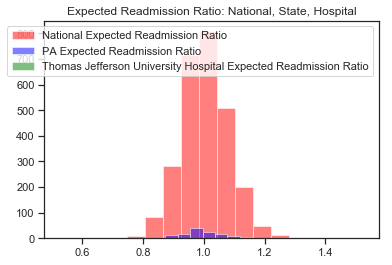

In [30]:
#Plot to compare national vs state vs hospital 'Excess Readmission Ratio'

# Creating variables for each of the 3 conditions to graph using the basic
# matplotlib functionality.
natexpratio = df_readmin['Excess Readmission Ratio']
paexpratio = df_readmin.loc[(df_readmin['State']=='PA')]['Excess Readmission Ratio']
tjuhexpratio = df_readmin.loc[(df_readmin['Hospital Name']=='THOMAS JEFFERSON UNIVERSITY HOSPITAL')]['Excess Readmission Ratio']

# Making overlapping histograms.
plt.hist(natexpratio, color='red',  alpha=.5,label='National Expected Readmission Ratio') 
plt.hist(paexpratio, color='blue', alpha=.5,label='PA Expected Readmission Ratio')
plt.hist(tjuhexpratio, color='green', alpha=.5,label='Thomas Jefferson University Hospital Expected Readmission Ratio')  

plt.xlabel('')
plt.legend(loc='upper right')
plt.title('Expected Readmission Ratio: National, State, Hospital')
plt.show()

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic


plt.show()